**Program 3: Implement a stacked autoencoder using Python and popular deep learning libraries like TensorFlow
or PyTorch to perform unsupervised feature learning and reconstruction tasks. Use MNIST dataset.**

In [4]:
pip install tensorflow

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1051 - val_loss: 0.0396
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0371 - val_loss: 0.0302
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0294 - val_loss: 0.0255
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0252 - val_loss: 0.0232
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0227 - val_loss: 0.0211
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0212 - val_loss: 0.0199
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0199 - val_loss: 0.0185
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0186 - val_loss: 0.0177
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0179 - val_loss: 0.0172
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0174 - val_loss: 0.0165
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0168 - val_loss: 0.0161
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

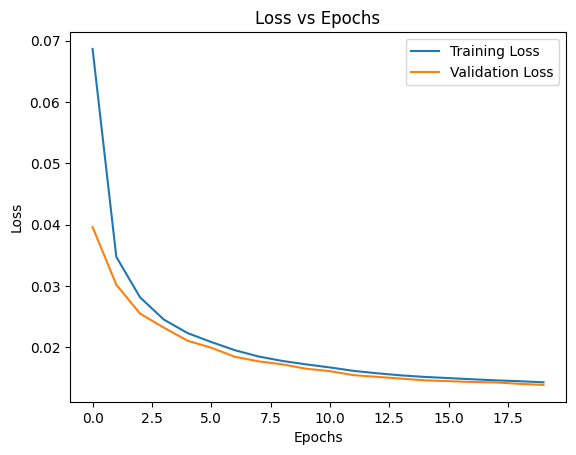

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


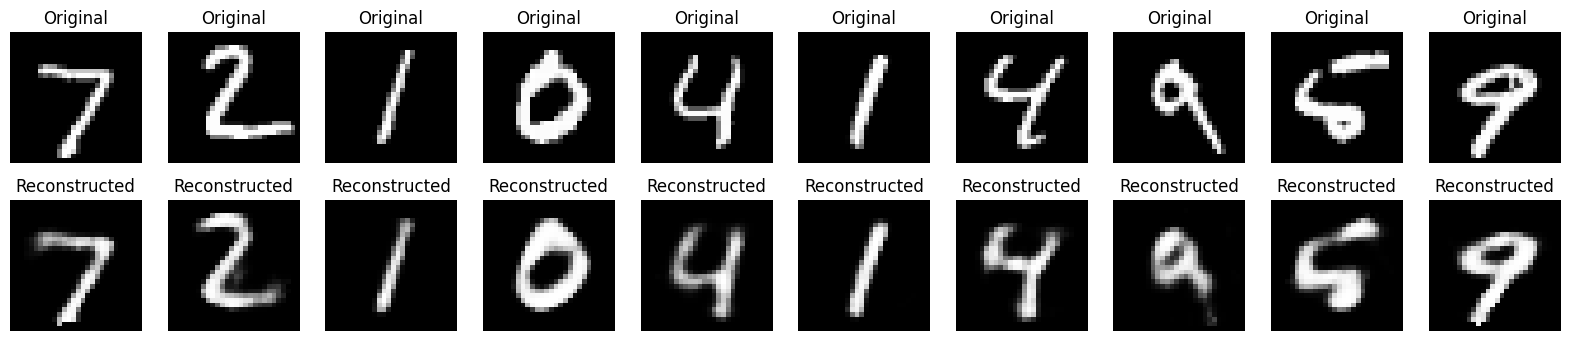

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Define a stacked autoencoder
def build_stacked_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim[0], activation='relu')(input_layer)
    for units in encoding_dim[1:]:
        encoded = Dense(units, activation='relu')(encoded)

    # Decoder
    decoding_dim = encoding_dim[::-1]
    decoded = Dense(decoding_dim[0], activation='relu')(encoded)
    for units in decoding_dim[1:-1]:
        decoded = Dense(units, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)

    # Encoder model for feature extraction
    encoder = Model(input_layer, encoded)

    return autoencoder, encoder

# Build the autoencoder
encoding_dim = [128, 64, 32]  # Layers in the encoder
autoencoder, encoder = build_stacked_autoencoder(input_dim=784, encoding_dim=encoding_dim)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Evaluate reconstruction performance
reconstructed = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
